In [18]:
import pandas as pd 
import matplotlib.pyplot as plt

# Note
* This Dataset is estimation of soil nutrients with lab data and satellite data for some polygons(plots).
* Nutrients are Nitrogen - N, Phosphorus - P, K - Potassium, OC - Soil organic carbon 
* Satellite data (Google earth engine) genereted with Machine learning model 
* Lab data is physically tested with instruments 
* Now i will compare lab data (nutrient_Lab) vs satellite data (nutrient) i.e (N vs N_Lab)



In [4]:
df = pd.read_csv('data/scatter_data.csv')
df.describe().round(2)

,fid,N,P,K,OC,N_Lab,P_Lab,K_Lab,OC_Lab
count,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00
mean,62180.78,239.75,26.93,222.20,0.45,299.10,33.81,175.02,0.56
std,1281.60,36.08,6.72,44.00,0.17,85.02,35.44,100.82,0.19
min,60940.00,185.30,14.60,167.30,0.18,200.67,4.04,36.15,0.22
25%,61040.00,208.90,22.48,189.20,0.35,241.00,20.05,73.70,0.38
50%,61044.00,220.70,25.04,208.26,0.43,269.93,23.55,163.70,0.57
75%,63535.00,277.51,32.80,271.22,0.50,339.58,25.90,267.90,0.68
max,63538.00,305.78,42.75,300.65,0.99,580.85,168.70,382.30,0.94


Removing the columns which are not needed 

In [57]:
nuts

{'N': ['Nitrogen', 150, 600],
 'P': ['Phosphorus', 3, 175],
 'K': ['Pottasium'],
 'OC': ['Soil Organic Carbon']}

In [85]:
data = df.copy()
data = data.drop(columns= ['fid', 'Zones'])
data.head()
nuts = {'N':['Nitrogen', 170, 596], 'P':['Phosphorus', -2, 175], 'K':['Pottasium',30,400 ],'OC':['Soil Organic Carbon',0.12, 1.05]}

# Plotting Lab  vs Satellite Data 

In [86]:
def ma_mi(l,s):
    x1 = abs(l.min() - s.min())
    x =  min(l.min() ,s.min()) - x1
    y1 = abs(l.max() - s.max())
    y =  max(l.max() ,s.max())  + x1
    return x,y

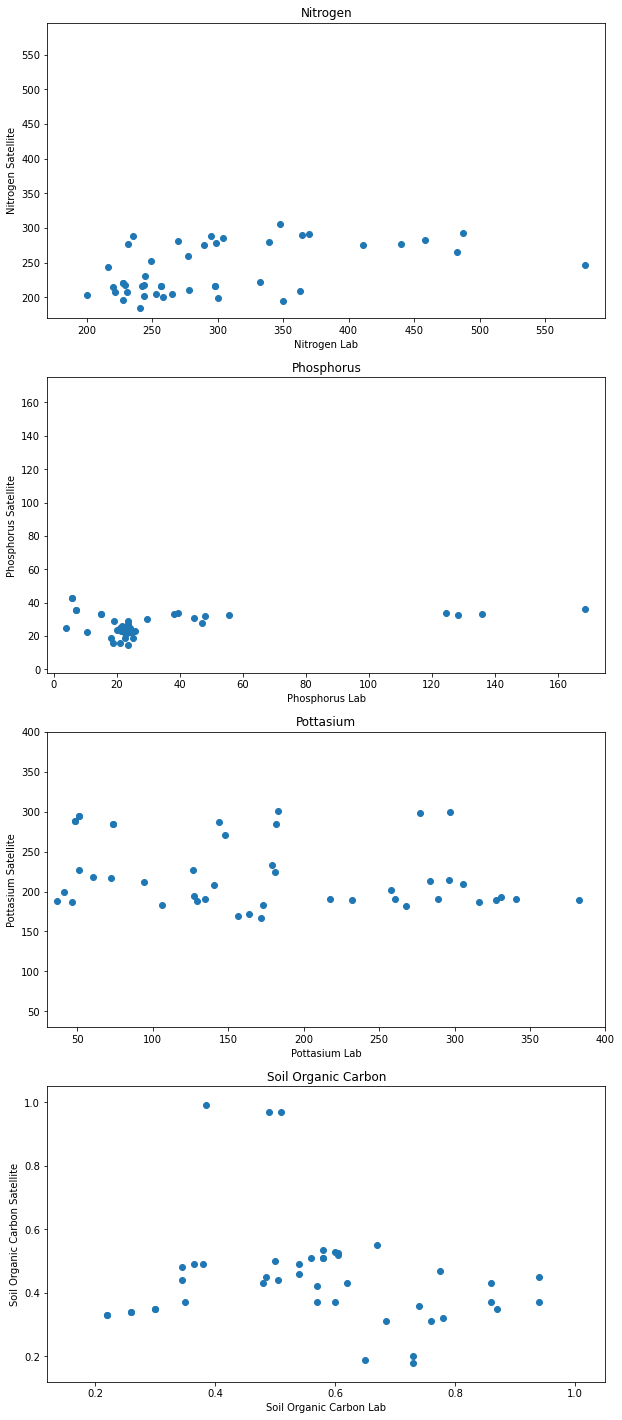

In [87]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,25 ))
for ind, col in enumerate(nuts.keys()):
    lab = df[f"{col}_Lab"]
    sat = df[col]
    axes[ind].scatter(lab, sat)
    axes[ind].set_title(f'{nuts[col][0]}')
    x, y = nuts[col][1], nuts[col][2]
    axes[ind].set_xlim([x,y])
    axes[ind].set_ylim([x, y])
    axes[ind].set_xlabel(f"{nuts[col][0]} Lab")
    axes[ind].set_ylabel(f"{nuts[col][0]} Satellite")



